# AIRE
[autoimmune polyendocrinopathy syndrome type I (APS1)](https://omim.org/entry/240300) is caused by homozygous, compound heterozygous, or heterozygous mutation in the autoimmune regulator gene (AIRE).

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


## AIRE
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for AIRE.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service

gene_symbol = 'AIRE'
mane_tx_id = 'NM_000383.4'
mane_protein_id = 'NP_000374.1' # autoimmune regulator

pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = gene_symbol
phenopacket_store_release = '0.1.24'


registry = configure_phenopacket_registry()
cohort_creator = configure_caching_cohort_creator(hpo)
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 58/58 [00:00<00:00, 789.71 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
56,Hypoparathyroidism
37,Primary adrenal insufficiency
35,Chronic mucocutaneous candidiasis
14,Recurrent fungal infections
13,Decreased circulating parathyroid hormone level
11,Alopecia
8,Antiparietal cell antibody positivity
8,Alopecia universalis
7,Vitiligo
7,Anti-thyroid peroxidase antibody positivity


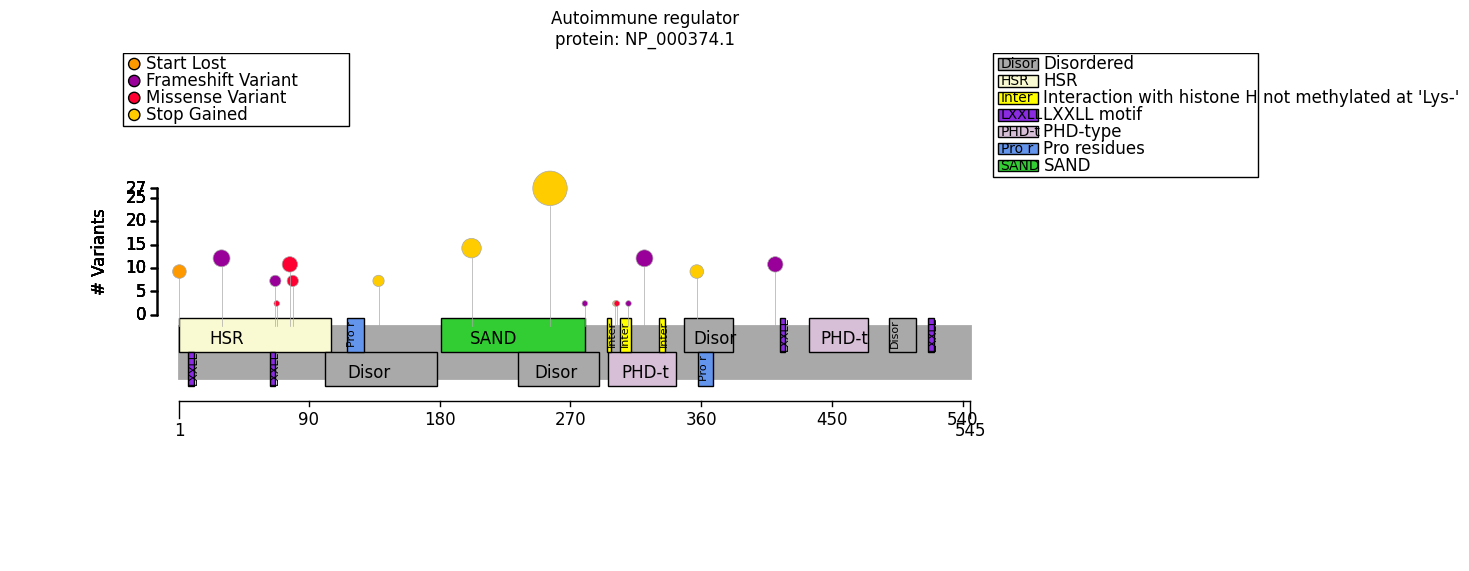

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

aire_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
aire_fig.tight_layout()

[Halonen et al (2002)](https://pubmed.ncbi.nlm.nih.gov/12050215/) stated that  patients carrying at least one R257X allele, the incidence of Addison’s disease as well as mucocutaneous candidiasis was higher than in the others  (P < 0.001). The authors did not provide row-level data.

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

# Compare monoallelic and biallelic cases

In [7]:


from gpsea.analysis.predicate import variant_key
from gpsea.analysis.clf import biallelic_classifier
from gpsea.view import MtcStatsViewer

r257ter = variant_key("21_44289773_44289773_C_T") #c.769C>T	p.Arg257Ter

r357ter_clf = biallelic_classifier(a_predicate=r257ter,
                                        b_predicate=~r257ter,
                                        a_label="R257*",
                                        b_label="other",
                                        partitions=((0,1), (2,)))
r357ter_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r357ter_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(r357ter_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,3
"Skipping ""general"" level terms",67
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),101


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=r357ter_result)

Allele group,R257*/R257* OR R257*/other,other/other,Corrected p values,p values
Nephrocalcinosis [HP:0000121],0/10 (0%),6/18 (33%),0.909444,0.061873
Antiparietal cell antibody positivity [HP:6000343],3/5 (60%),5/24 (21%),0.909444,0.111877
Alopecia universalis [HP:0002289],0/8 (0%),8/25 (32%),0.909444,0.151574
Malabsorption [HP:0002024],5/13 (38%),2/14 (14%),0.939130,0.208696
Chronic mucocutaneous candidiasis [HP:0002728],12/12 (100%),23/28 (82%),1.000000,0.298009
Primary adrenal insufficiency [HP:0008207],18/24 (75%),18/30 (60%),1.000000,0.383959
Cholelithiasis [HP:0001081],1/11 (9%),0/13 (0%),1.000000,0.458333
Anti-thyroid peroxidase antibody positivity [HP:0025379],1/2 (50%),6/23 (26%),1.000000,0.490000
Alopecia [HP:0001596],7/14 (50%),12/21 (57%),1.000000,0.739107
Recurrent cutaneous fungal infections [HP:0011370],12/12 (100%),23/23 (100%),1.000000,1.000000


In [9]:
from gpsea.analysis.temporal.endpoint import hpo_onset
term_id = "HP:0002728"  # Chronic mucocutaneous candidiasis HP:0002728
endpoint = hpo_onset(hpo=hpo, term_id=term_id)
endpoint.description

'Compute time until onset of Chronic mucocutaneous candidiasis'

In [10]:
from gpsea.analysis.temporal.stats import LogRankTest
survival_statistic = LogRankTest()
from gpsea.analysis.temporal import SurvivalAnalysis
survival_analysis = SurvivalAnalysis(
    statistic=survival_statistic,
)
r357t_CMC_onset_result = survival_analysis.compare_genotype_vs_survival(
    cohort=cohort,
    gt_clf=r357ter_clf,
    endpoint=endpoint,
)

In [11]:
print(f"log-rank p-value for {term_id} and R357*/R357* or R357*/other versus other/other {r357t_CMC_onset_result.pval:.4f}")

log-rank p-value for HP:0002728 and R357*/R357* or R357*/other versus other/other 0.0192


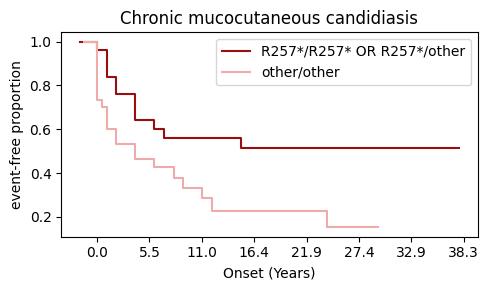

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(5, 3))
r357t_CMC_onset_result.plot_kaplan_meier_curves(ax=ax)
def days_to_years(x, pos):
    return f"{x / 365.25:.1f}"


ax.xaxis.set_major_formatter(FuncFormatter(days_to_years))
ax.set_xlabel("Onset (Years)")
ax.set_ylabel("event-free proportion")
ax.set_title("Chronic mucocutaneous candidiasis")

plt.tight_layout()
plt.show()

# Summary

In [13]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

m_results = (
    GPAnalysisResultSummary.from_mono(
        result=r357t_CMC_onset_result,
    ),
)

f_results =  (
    GPAnalysisResultSummary.from_multi(
        result=r357ter_result,
        xrefs={
            term_id: ('PMID:12050215'),
        },
        interpretation="""The authors reported a higher prevalence of chronic mucocutanous candidiasis with the variant Arg357Ter than with other variants. We did not identify a significant difference in prevalence."""
    ),
)

cohort_name = gene_symbol

report = GpseaAnalysisReport(
    name=cohort_name,
    cohort=cohort,
    mono_results=m_results,
    fet_results=f_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption="The authors reported a higher prevalence of chronic mucocutanous candidiasis with the variant Arg357Ter than with other variants. We did not identify a significant difference in prevalence"
)

In [14]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [15]:
summarizer.process_latex(report=report, protein_fig=aire_fig)

Figure saved to ../../supplement/img/AIRE_protein_diagram-draft.pdf
Output to ../../supplement/tex/AIRE_summary_draft.tex
